<a href="https://colab.research.google.com/github/Dipanjan2023/Netflix-Data-Exploration-and-Visualisation/blob/main/Netflix_Data_Exploration_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Let us import the Dataset (.csv file) from the URL provided.

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O "netflix.csv"

--2022-11-27 03:10:10--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.251.24, 13.226.251.62, 13.226.251.107, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.251.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  2.10MB/s    in 1.5s    

2022-11-27 03:10:12 (2.10 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



*    **Business Problem**

We have to analyze the data provided in the Netflix Dataset and generate some insights that could help Netflix to decide the type of TV Shows / Movies they should produce to generate more revenue and how they can grow the business in different countries and entertain people across the globe.

*   **Basic Metrics**

The Dataset has been given in a .csv file, which contains a dataframe.

The dataframe consists of 12 columns named as:

*   **Show ID:** Unique ID for every Movie / TV Show
*   **Type:** Identifier - A Movie or TV Show
*   **Title:** Title of the Movie / TV Show
*   **Director:** Director of the Movie / TV Show
*   **Cast:** Actors involved in the Movie / TV Show
*   **Country:** Country where the Movie / TV Show was produced
*   **Date Added:** Date it was added on Netflix
*   **Release Year:** Actual Release year of the Movie / TV Show
*   **Rating:** TV Rating of the Movie / TV Show
*   **Duration:** Total Duration - in Minutes or Number of Seasons
*   **Listed in:** Genre of the Movie / TV Show
*   **Description:** The Summary Description







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn_pandas import CategoricalImputer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.ticker as ticker
%matplotlib inline

In [ ]:
netflix = pd.read_csv("netflix.csv")

In [ ]:
netflix.shape

(8807, 12)

There are **8807 rows** and **12 columns** in the dataset.

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It means, the columns with **missing values** are:

1. Director
2. Cast
3. Country
4. Date Added
5. Rating
6. Duration

We will fill the missing values of **Director, Cast, Country, Rating** and **duration** with **Unknown**. For **Date added**, we will consider the *last date* that is present in the Netflix dataset.

In [ ]:
# netflix_data = netflix.apply(lambda x: x.fillna(x.value_counts().index[0]))
# netflix_data.head()

In [ ]:
netflix['director'] = netflix['director'].fillna('Unknown Director')
netflix['cast'] = netflix['cast'].fillna('Unknown Cast')
netflix['country'] = netflix['country'].fillna('Unknown Country')
netflix['rating'] = netflix['rating'].fillna('Unknown Rating')

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [ ]:
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].max())

In [ ]:
netflix['director']= netflix['director'].apply(lambda x : x.split(", "))
netflix['cast']= netflix['cast'].apply(lambda x : x.split(", "))
netflix['country']= netflix['country'].apply(lambda x : x.split(", "))
netflix['listed_in']= netflix['listed_in'].apply(lambda x : x.split(", "))

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown Cast],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown Country],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[Unknown Director],[Unknown Cast],[Unknown Country],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[Unknown Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


This is the Statistical Summary of Netflix Dataset. As there is no other numerical columns apart from **release_year**, it does not provide any Statistical information for other columns.

In [ ]:
netflix_movie = netflix[netflix['type'] == 'Movie'].reset_index()
netflix_tv = netflix[netflix['type'] == 'TV Show'].reset_index()

In [ ]:
netflix_movie['duration'] = netflix_movie['duration'].fillna('0 min')
netflix_tv['duration'] = netflix_tv['duration'].fillna('0 season')

**1. How has the number of movies released per year changed over the last 20-30 years?**

In [ ]:
movie_count_by_release_year = netflix_movie.groupby(netflix_movie['release_year'])['show_id'].count().to_frame()
movie_count_by_release_year.columns = ['count']
movie_count_by_release_year.reset_index(inplace = True)

In [ ]:
tv_count_by_release_year = netflix_tv.groupby(netflix_movie['release_year'])['show_id'].count().to_frame()
tv_count_by_release_year.columns = ['count']
tv_count_by_release_year.reset_index(inplace = True)

In [ ]:
movie_count_by_release_year.sort_values(by = 'count', ascending = False).reset_index(drop = True)[:10]

,release_year,count
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517
5,2015,398
6,2021,277
7,2014,264
8,2013,225
9,2012,173


In [ ]:
tv_count_by_release_year.sort_values(by = 'count', ascending = False).reset_index(drop = True)[:10]

,release_year,count
0,2019,562
1,2020,514
2,2021,277
3,2018,272
4,2017,149
5,2016,117
6,2015,82
7,2014,79
8,2013,73
9,2012,62


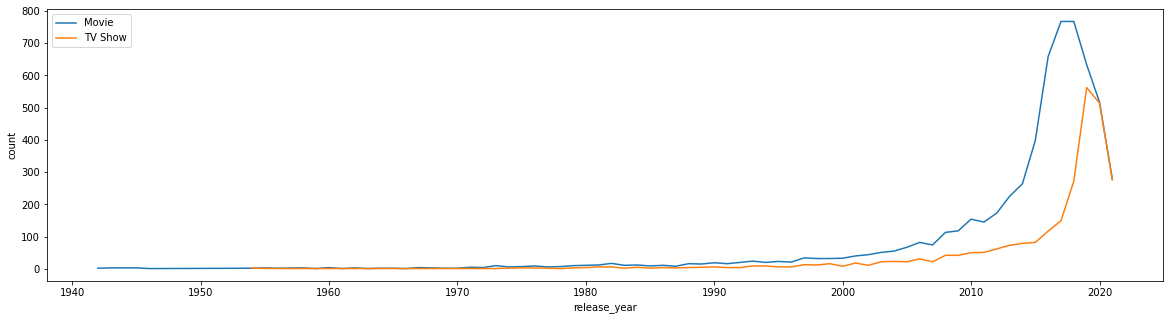

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = movie_count_by_release_year, x = movie_count_by_release_year['release_year'], y = movie_count_by_release_year['count'], label = 'Movie')
sns.lineplot(data = tv_count_by_release_year, x = tv_count_by_release_year['release_year'], y = tv_count_by_release_year['count'], label = 'TV Show')
plt.legend()

From the above linear plot, it is evident that number of Movies and TV Shows have released much more **after the start of 21st century, i.e. 2000 onwards**, with the advancement of technology.

However, Movies have been released more than that of TV Shows, even after 2000. There is a peak around 2018-2019 for both Movies and TV Shows; which indicates that around that time period, the Movies and TV Shows added in Netflix are released mostly. So just before the COVID Lockdown, we found a peak on both of the TV Shows and Movie release. Although, there is a significant drop after that, for both Movies and TV Shows, because of COVID-19 and universal Lockdown.

---


**2. Comparison of TV Shows vs. Movies.**

In [ ]:
show_details = netflix.groupby('type')['show_id'].count().to_frame()
show_details.columns = ['count']
show_details.reset_index(inplace = True)
show_details

,type,count
0,Movie,6131
1,TV Show,2676


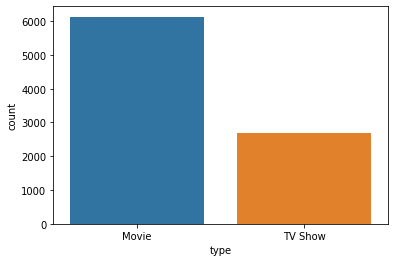

In [ ]:
sns.countplot(x = netflix['type'])

* Count of **Movies: 6131**
* Count of **TV Shows: 2676**

Hence, there are significantly more number of movies, than that of TV Shows.

---

**3. What is the best time to launch a TV show?**

In [ ]:
netflix_tv['month_added'] = netflix_tv['date_added'].dt.month_name()
netflix_tv_monthly_added = netflix_tv.groupby('month_added')['title'].count().to_frame().sort_values(by = 'title', ascending = False).reset_index()
netflix_tv_monthly_added.rename(columns = {'title': 'Count of TV Shows'}, inplace = True)
netflix_tv_monthly_added

,month_added,Count of TV Shows
0,December,266
1,July,262
2,September,261
3,August,236
4,June,236
5,October,215
6,April,214
7,March,213
8,November,207
9,May,193


Considering previous trends, most of the TV shows have been released in **December**. So the **Winter Season**, during **Christmas** and **New Year** is the very important time-period for Netflix to increase their revenue by releasing **TV Shows**.

---



**4. Analysis of Actors/Directors of different types of Shows/Movies.**

In [ ]:
netflix_movie_cast = netflix_movie.explode('cast')

In [ ]:
netflix_movie_cast_count = netflix_movie_cast.groupby('cast')['title'].count().sort_values(ascending=False).reset_index()[1:11]
netflix_movie_cast_count.rename(columns = {'title': 'Count of Movies'}, inplace = True)
netflix_movie_cast_count

,cast,Count of Movies
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Om Puri,30
5,Akshay Kumar,30
6,Paresh Rawal,28
7,Julie Tejwani,28
8,Amitabh Bachchan,28
9,Boman Irani,27
10,Rupa Bhimani,27


Text(0, 0.5, 'Movie Count')

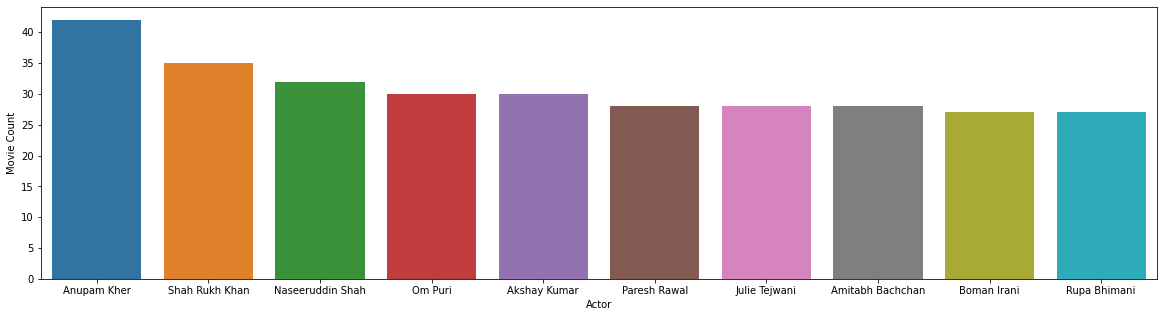

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(data = netflix_movie_cast_count, x = 'cast', y = 'Count of Movies')
plt.xlabel('Actor')
plt.ylabel('Movie Count')

So in the Netflix Movies Dataset, **Anupam Kher** has **42 movies** listed, while **Shah Rukh Khan** has **35**. It means, Indian Actors have a significant role in the Netflix Movies.

In [ ]:
netflix_movie_cast_director = netflix_movie_cast.explode('director')

In [ ]:
netflix_movie_cast_director_count = netflix_movie_cast_director.groupby(['cast', 'director'])['title'].count().sort_values(ascending=False).reset_index()[1:20]
netflix_movie_cast_director_count.rename(columns = {'title': 'Count of Movies'}, inplace = True)
netflix_movie_cast_director_count

,cast,director,Count of Movies
1,Rajesh Kava,Rajiv Chilaka,19
2,Julie Tejwani,Rajiv Chilaka,19
3,Rupa Bhimani,Rajiv Chilaka,18
4,Jigna Bhardwaj,Rajiv Chilaka,18
5,Vatsal Dubey,Rajiv Chilaka,16
6,Mousam,Rajiv Chilaka,13
7,Swapnil,Rajiv Chilaka,13
8,Fortune Feimster,Unknown Director,11
9,David Spade,Unknown Director,11
10,London Hughes,Unknown Director,10


From this analysis, we understood that there are **19** distinct movies with Actor-Director pair as **Rajesh Kava** and **Rajiv Chilaka**.

In [ ]:
netflix_movie_cast_genre = netflix_movie_cast.explode('listed_in')

In [ ]:
netflix_movie_cast_genre_count = netflix_movie_cast_genre.groupby(['cast', 'listed_in'])['title'].count().sort_values(ascending=False).reset_index()[:20]
netflix_movie_cast_genre_count.rename(columns = {'title': 'count of movies', 'listed_in': 'genre'}, inplace = True)
netflix_movie_cast_genre_count

,cast,genre,count of movies
0,Unknown Cast,Documentaries,424
1,Unknown Cast,International Movies,178
2,Unknown Cast,Sports Movies,54
3,Anupam Kher,International Movies,38
4,Unknown Cast,Music & Musicals,35
5,Unknown Cast,Children & Family Movies,33
6,Shah Rukh Khan,International Movies,32
7,Shah Rukh Khan,Dramas,28
8,Anupam Kher,Dramas,28
9,Naseeruddin Shah,Dramas,28


Ignoring the Outliers (unknowns), **Anupam Kher** has **38** movies which is categorized as **'International Movies'**.

In [ ]:
netflix_tv_cast = netflix_tv.explode('cast')

In [ ]:
netflix_tv_cast_count = netflix_tv_cast.groupby('cast')['title'].count().sort_values(ascending=False).reset_index()[1:11]
netflix_tv_cast_count.rename(columns = {'title': 'Count of TV Shows'}, inplace = True)
netflix_tv_cast_count

,cast,Count of TV Shows
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Junichi Suwabe,17
4,Daisuke Ono,17
5,Ai Kayano,17
6,Yuichi Nakamura,16
7,Jun Fukuyama,15
8,Yoshimasa Hosoya,15
9,David Attenborough,14
10,Vincent Tong,13


Text(0, 0.5, 'TV Show Count')

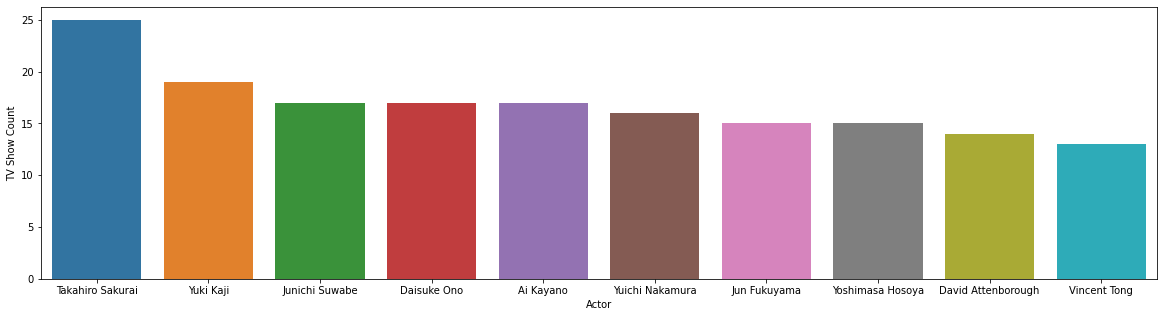

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(data = netflix_tv_cast_count, x = 'cast', y = 'Count of TV Shows')
plt.xlabel('Actor')
plt.ylabel('TV Show Count')

From the above barplot, we can determine that **Takahiro Sakurai** has **maximum (25) TV Shows** listed in Netflix, followed by **Yuki Kaji (19)**.

In [ ]:
netflix_tv_cast_director = netflix_tv_cast.explode('director')
netflix_tv_cast_director_count = netflix_tv_cast_director.groupby(['cast', 'director'])['title'].count().sort_values(ascending=False).reset_index()[1:20]
netflix_tv_cast_director_count.rename(columns = {'title': 'Count of TV Shows'}, inplace = True)
#netflix_tv_cast_director_count

In [ ]:
netflix_tv_cast_genre = netflix_tv_cast.explode('listed_in')

In [ ]:
netflix_tv_cast_genre_count = netflix_tv_cast_genre.groupby(['cast', 'listed_in'])['title'].count().sort_values(ascending=False).reset_index()[:20]
netflix_tv_cast_genre_count.rename(columns = {'title': 'count of movies', 'listed_in': 'genre'}, inplace = True)
netflix_tv_cast_genre_count

,cast,genre,count of movies
0,Unknown Cast,Docuseries,207
1,Unknown Cast,International TV Shows,109
2,Unknown Cast,Reality TV,92
3,Unknown Cast,Crime TV Shows,75
4,Unknown Cast,British TV Shows,45
5,Unknown Cast,Kids' TV,42
6,Unknown Cast,Science & Nature TV,35
7,Takahiro Sakurai,Anime Series,24
8,Unknown Cast,TV Comedies,24
9,Takahiro Sakurai,International TV Shows,22


Ignoring Outliers (unknowns), **Takahiro Sakurai** has **maximum (24)** TV Shows which belong to the genre **'Anime Series'**.

**5. Does Netflix has more focus on TV Shows than movies in recent years?**

In [ ]:
netflix_movie_year_wise_added = netflix_movie.groupby(netflix_movie['date_added'].dt.year)['title'].count().to_frame().reset_index()
netflix_tv_year_wise_added = netflix_tv.groupby(netflix_tv['date_added'].dt.year)['title'].count().to_frame().reset_index()
netflix_year_wise_added = pd.merge(netflix_movie_year_wise_added, netflix_tv_year_wise_added, on = 'date_added')
netflix_year_wise_added.rename(columns = {'date_added':'Year_Added', 'title_x':'Movie_Count',
                              'title_y':'TV_Show_Count'}, inplace = True)
netflix_year_wise_added = netflix_year_wise_added.set_index('Year_Added')
netflix_year_wise_added

,Movie_Count,TV_Show_Count
Year_Added,,
2008,1,1
2013,6,5
2014,19,5
2015,56,26
2016,253,176
2017,839,349
2018,1237,412
2019,1424,592
2020,1284,595


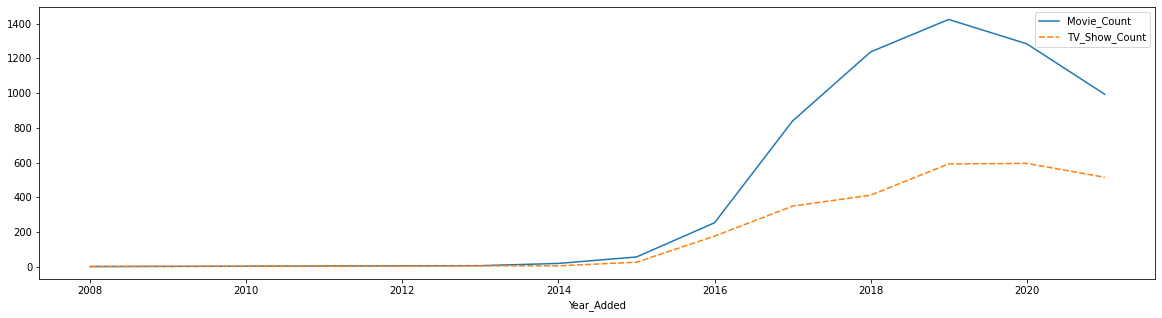

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = netflix_year_wise_added)

No, Netflix is adding more Movies than that of TV Shows, even after 2015, when there is a significant rise of adding TV Shows and Movies in Netflix. It happens because TV Shows have much more restriction on different countries, where the chances of constraints of Movies to be released Worldwide is lesser.

**6. What content is available in different countries?**

In [ ]:
netflix_country = netflix.explode('country')

In [ ]:
netflix_country_wise_release = netflix_country.groupby('country')['title'].count().sort_values(ascending = False).reset_index()

In [ ]:
netflix_country_wise_release.drop(netflix_country_wise_release.index[(netflix_country_wise_release['country'] == 'Unknown Country')], axis = 0, inplace = True)

In [ ]:
netflix_country_wise_release = netflix_country_wise_release[:10]

([<matplotlib.patches.Wedge at 0x7f89362c3d90>,
 [Text(0.040025317856843726, 1.099271565142326, 'United States'),
  Text(-1.0285989287941686, -0.38985156621910455, 'India'),
  Text(-0.46756208964377943, -0.9956835302082397, 'United Kingdom'),
  Text(0.08843735772000706, -1.0964391609932143, 'Canada'),
  Text(0.45759975019630844, -1.0003011889527456, 'France'),
  Text(0.7292637840046727, -0.8235134081113593, 'Japan'),
  Text(0.8970177430464024, -0.6366782300816786, 'Spain'),
  Text(1.0022902679061936, -0.45322645428144526, 'South Korea'),
  Text(1.0698707313993059, -0.25568851772247053, 'Germany'),
  Text(1.0972834579194333, -0.07725938762617307, 'Mexico')],
 [Text(0.021831991558278394, 0.5996026718958141, '49%'),
  Text(-0.5610539611604556, -0.2126463088467843, '14%'),
  Text(-0.2550338670784251, -0.5431001073863125, '11%'),
  Text(0.04823855875636748, -0.5980577241781169, '6%'),
  Text(0.24959986374344095, -0.5456188303378611, '5%'),
  Text(0.3977802458207305, -0.449189131697105, '4%'

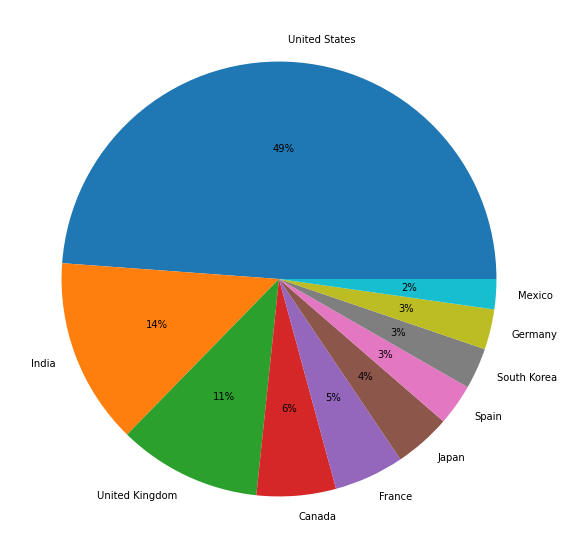

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(netflix_country_wise_release['title'], labels = netflix_country_wise_release['country'], autopct='%.0f%%')

**United States** has maximum number of releases (**49%**, almost half of the contents belong to United States!) over Netflix. Then comes **India**, with **14%** of the contents, followed by **United Kingdom (11%)**.

In [ ]:
netflix_movie['duration'] = netflix_movie['duration'].str.split(expand = True)[0].astype(int)

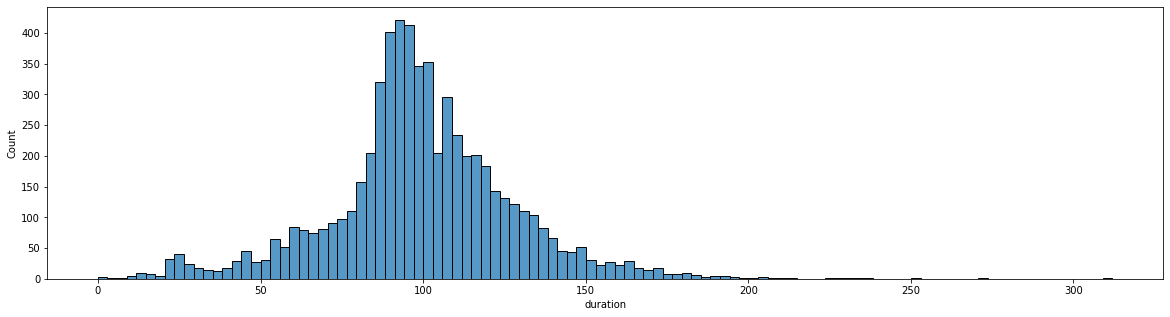

In [ ]:
plt.figure(figsize = (20, 5))
plot_ = sns.histplot(data = netflix_movie, x = netflix_movie['duration'])

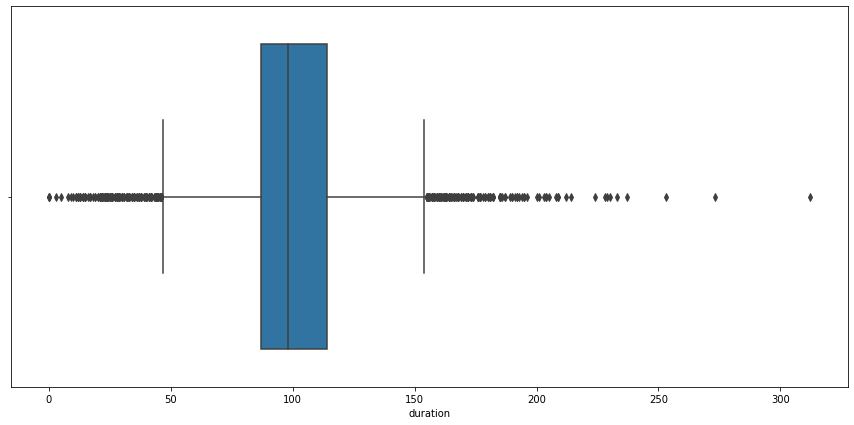

In [ ]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = netflix_movie, x = netflix_movie['duration'])

From the Histogram and Boxplot, it can be concluded that the **average length** of movies is **100 minutes**. There are few outliers, which has the duration of less than 50 and more than 150 minutes.

In [ ]:
netflix_tv['duration'] = netflix_tv['duration'].str.split(expand = True)[0].astype(int)

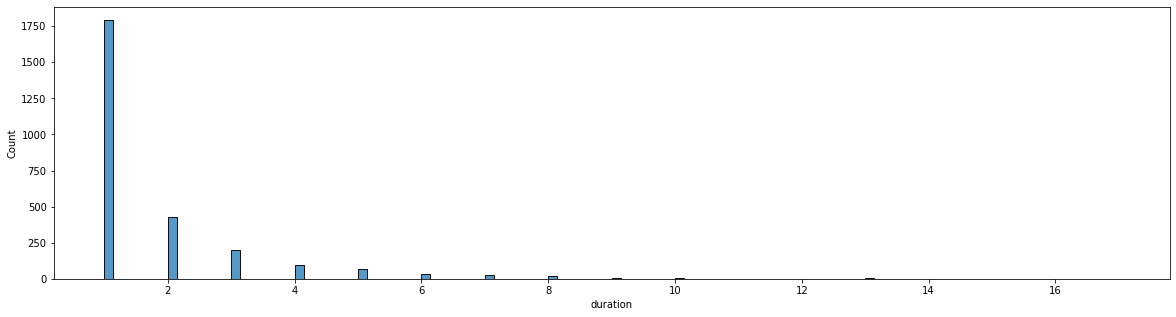

In [ ]:
plt.figure(figsize = (20, 5))
plot_ = sns.histplot(data = netflix_tv, x = netflix_tv['duration'])

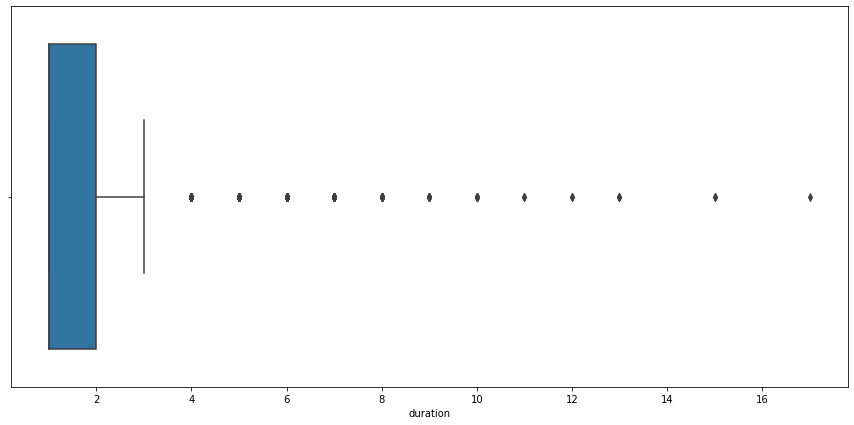

In [ ]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = netflix_tv, x = netflix_tv['duration'])

From the above Histogram and Boxplot, **most of the TV Shows** have **1 season** only. Beyond 3 seasons are considered as Outliers.

In [ ]:
netflix_country_genre = netflix_country.explode('listed_in')

In [ ]:
netflix_country_wise_genre = netflix_country_genre.groupby('country')['listed_in'].apply(list).to_frame().reset_index()
netflix_country_wise_genre.drop(index = 0).reset_index(drop = True)

,country,listed_in
0,Afghanistan,"[Documentaries, International Movies]"
1,Albania,"[Dramas, International Movies]"
2,Algeria,"[Dramas, Independent Movies, International Mov..."
3,Angola,"[Action & Adventure, International Movies]"
4,Argentina,"[Dramas, International Movies, Thrillers, Crim..."
...,...,...
122,Vatican City,"[Documentaries, Faith & Spirituality, Internat..."
123,Venezuela,"[Dramas, International Movies, Thrillers, Docu..."
124,Vietnam,"[Dramas, International Movies, Romantic Movies..."
125,West Germany,"[International TV Shows, TV Comedies, Document..."


Here we have determined Country wise different Genres available.

In [ ]:
netflix_country_wise_genre.loc[netflix_country_wise_genre['country'].isin(['India', 'United States'])].reset_index(drop = True)

,country,listed_in
0,India,"[International TV Shows, Romantic TV Shows, TV..."
1,United States,"[Documentaries, Dramas, Independent Movies, In..."


Here we have determined Genres of India and United States, which countries have the dominance in Netflix Movies and TV Shows.

In [ ]:
netflix_country_wise_popular_genre = netflix_country_genre.groupby('country')['listed_in'].max().to_frame().reset_index()
netflix_country_wise_popular_genre.drop(index = 0).reset_index(drop = True)

,country,listed_in
0,Afghanistan,International Movies
1,Albania,International Movies
2,Algeria,International Movies
3,Angola,International Movies
4,Argentina,Thrillers
...,...,...
122,Vatican City,International Movies
123,Venezuela,Thrillers
124,Vietnam,Thrillers
125,West Germany,Thrillers


Text(0, 0.5, 'Count of Different Genres Popular in Different Countries')

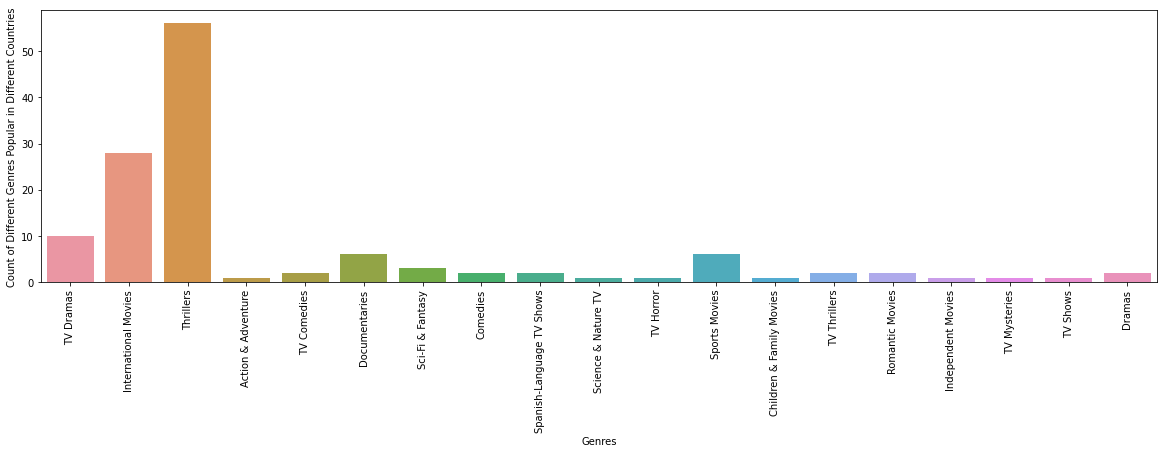

In [ ]:
plt.figure(figsize = (20, 5))
sns.countplot(data = netflix_country_wise_popular_genre, x = 'listed_in')
plt.xticks(rotation='vertical')
plt.xlabel('Genres')
plt.ylabel('Count of Different Genres Popular in Different Countries')

Here, we have found the most popular Genres available across globe. Interestingly, Netflix has mostly **Thriller** content.

In [ ]:
netflix_country_wise_popular_genre.loc[netflix_country_wise_popular_genre['country'].isin(['India', 'United States'])].reset_index(drop = True)

,country,listed_in
0,India,Thrillers
1,United States,Thrillers


Thrillers are also popular in India and United States as well!

In [ ]:
netflix_country_wise_rating = netflix_country.groupby('country')['rating'].apply(list).to_frame().reset_index()
netflix_country_wise_rating.drop(index = 0).reset_index(drop = True)

,country,rating
0,Afghanistan,[TV-MA]
1,Albania,[TV-MA]
2,Algeria,"[TV-14, TV-MA, TV-MA]"
3,Angola,[TV-MA]
4,Argentina,"[TV-MA, TV-MA, TV-MA, TV-MA, TV-MA, TV-MA, TV-..."
...,...,...
122,Vatican City,[PG]
123,Venezuela,"[TV-MA, TV-14, NR, TV-14]"
124,Vietnam,"[TV-14, TV-MA, TV-G, TV-14, TV-MA, TV-MA, TV-14]"
125,West Germany,"[TV-MA, TV-MA, TV-MA, TV-14, G]"


Here we have tried to determine different Ratings available for the contents released from different countries.

In [ ]:
netflix_country_wise_rating.loc[netflix_country_wise_rating['country'].isin(['India', 'United States'])].reset_index(drop = True)

,country,rating
0,India,"[TV-MA, TV-14, PG-13, TV-Y7, TV-PG, TV-G, TV-P..."
1,United States,"[PG-13, TV-MA, PG-13, TV-MA, PG-13, PG-13, PG-..."


The above table contains different ratings available from the contents released from Indian and United States.

In [ ]:
netflix_country_wise_popular_rating = netflix_country.groupby('country')['rating'].max().to_frame().reset_index()
netflix_country_wise_popular_rating.drop(index = 0).reset_index(drop = True)

,country,rating
0,Afghanistan,TV-MA
1,Albania,TV-MA
2,Algeria,TV-MA
3,Angola,TV-MA
4,Argentina,TV-Y
...,...,...
122,Vatican City,PG
123,Venezuela,TV-MA
124,Vietnam,TV-MA
125,West Germany,TV-MA


Text(0, 0.5, 'Count of Different Ratings Popular in Different Countries')

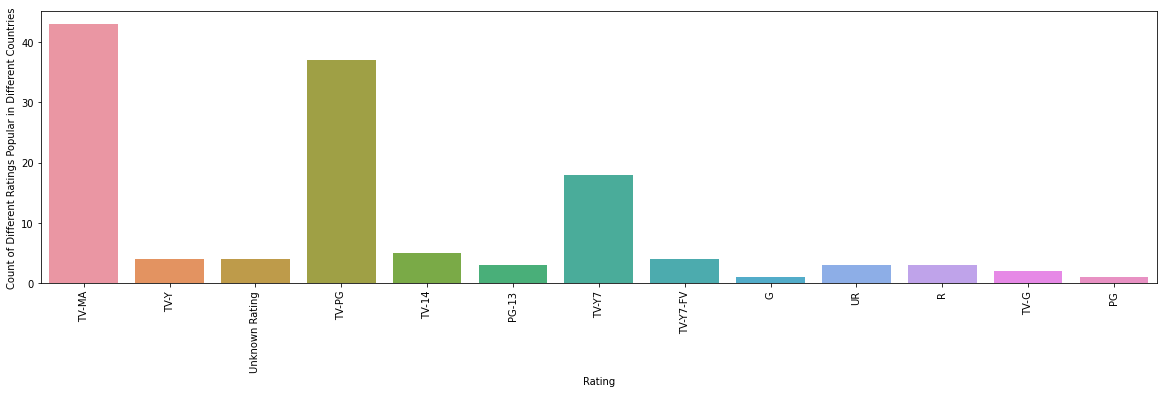

In [ ]:
plt.figure(figsize = (20, 5))
sns.countplot(data = netflix_country_wise_popular_rating, x = 'rating')
plt.xticks(rotation='vertical')
plt.xlabel('Rating')
plt.ylabel('Count of Different Ratings Popular in Different Countries')

The above barplot determines that **TV-MA** rating dominates among others.

In [ ]:
netflix_country_wise_popular_rating.loc[netflix_country_wise_popular_rating['country'].isin(['India', 'United States'])].reset_index(drop = True)

,country,rating
0,India,TV-Y7-FV
1,United States,UR


The above table determines rating of the contents released from India and United States.

In [ ]:
netflix_unique_attributes = []

In [ ]:
netflix_unique_attr = []
netflix_unique_attr.append(netflix['show_id'].nunique())
netflix_unique_attr.append(netflix['type'].nunique())
netflix_unique_attr.append(netflix['title'].nunique())
netflix_unique_attr.append(netflix_movie_cast_director['director'].nunique() + netflix_tv_cast_director['director'].nunique())
netflix_unique_attr.append(netflix_movie_cast['cast'].nunique() + netflix_tv_cast['cast'].nunique())
netflix_unique_attr.append(netflix_country['country'].nunique())
netflix_unique_attr.append(netflix['date_added'].nunique())
netflix_unique_attr.append(netflix['release_year'].nunique())
netflix_unique_attr.append(netflix['rating'].nunique())
netflix_unique_attr.append(netflix_movie['duration'].nunique() + netflix_tv['duration'].nunique())
netflix_unique_attr.append(netflix_movie_cast_genre['listed_in'].nunique() + netflix_tv_cast_genre['listed_in'].nunique())
netflix_unique_attr.append(netflix['description'].nunique())
netflix_unique_attributes.append(netflix_unique_attr)

In [ ]:
netflix_unique_attributes

[[8807, 2, 8807, 5078, 40816, 128, 1714, 74, 18, 221, 42, 8775]]

In [ ]:
netflix_unique_attribute = pd.DataFrame(netflix_unique_attributes, columns = netflix.columns.to_list())
netflix_unique_attribute.index.rename('Count of Unique Attributes', inplace = True)
netflix_unique_attribute

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
Count of Unique Attributes,,,,,,,,,,,,
0,8807,2,8807,5078,40816,128,1714,74,18,221,42,8775


*   **Insights based on Non-Graphical and Visual Analysis**

>* The above table indicates the range of different attributes. There are two type of contents: **Movie** and **TV Show**. Moreover, there are **40,816 actors** and **5078 directors** available in the dataset.
>* The distribution of variable is wide. Moreover, it is hard to establish any relationship between variables. However, we have plotted some linear curves for count of Movie and TV Shows with respect to Release Year.
>* Moreover, we have counted actors, directors, genres, countries with respect to one another and determined the Countplot, if it was feasible.
>* As there are hardly any numerical variables, we could not go for correlations, i.e. Pairplot or Heatmaps.

*   **Business Insights:**

1. Netflix has produced quite significant TV Shows in the last 10 years, although the Movies generate more revenue as those can be released Worldwide.
2. TV Shows become very popular during December of every year. So people love to watch Netflix TV Shows, while they celebrate Christmas at home or New Year.
3. Indian Actors are most popular in Movies. So Indian Movies are famous across the globe, which helps to increase the profit and revenue of Netflix.
4. The number of TV Shows and Movies got drastically increased Pre-COVID times (2018-2019), however the count falls sharply due to Lockdown in 2020.
5. Among different ratings, **TV-MA** provides the maximum revenue to Netflix.
6. United States dominates the Netflix Business, as they have produced 49% contents, that is almost half.
7. India is slowly enhancing the business of Market, by contributing 14% on the contents and being second after United States.
8. Thriller is the most popular genre in Movies. Anime Series is the most popular genre in TV Shows. hence Thriller Movies and Anime Series enhance the revenue of Netflix.


*   **Recommendations:**

1. Although Movies generate more revenues, Netflix should focus on releasing TV Series, preferably by their own production, as Generation-Z and Millenials are more attracted to TV Shows than Movies. People nowadays love to binge watch an entire season of a TV Series, rather than watching a 2-hours long Movies.
2. Netflix should focus to release TV Shows mostly on December, as most people prefer to watch Netflix during Winter Vacation.
3. Netflix should think of releasing more Indian Movies, as Indian Actors and Directors are quite famous worldwide through Netflix. They should bring Commercial Movies as well, as the contradictory information we found that Anupam Kher has more movies than Shah Rukh Khan.
4. TV Shows become very popular, pre-COVID. However, the release of TV Shows dropped because of Lockdown. After 2 years of COVID breakdown, Netflix should focus to increase the count to the equivalent of pre-COVID era.
5. Netflix should approach more number of Indian Actors, Producers, Directors to generate more Indian contents, as India ranks the 2nd position in terms of content present.
6. Anime Series are very famous. So Netflix should think to produce Anime TV Shows to entertain kids as well as adults across the globe.
7. Thriller is the most popular genre in Movies. Hence, Netflix should think to bring more Thriller contents.
8. TV Shows more than 3 seasons are difficult to follow for viewers. Hence Netflix should produce further TV Shows with not more than 3 seasons.
9. Movies with more than 150 minutes are irritating and time-taking to audience. Hence they should release / add Movies, not more than a length of 150 minutes.
10. Content with TV-MA rating should come more, as they generate much more revenue than others.